# Assignment #2 

### MACS 30000, Dr. Evans 

### Sanittawan Tan (sanittawan) 

In [77]:
# import packages 
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
# plt.style.use('seaboarn')

### 1. Imputing age and and gender 

I begin with data preparation before answering questions

In [78]:
# import BestIncome.txt and add headers 

headers = ["lab_inc", "cap_inc", "hgt", "wgt"]

best_income = pd.read_table("BestIncome.txt", sep=",", names = headers, index_col=False)

best_income.head()

,lab_inc,cap_inc,hgt,wgt
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [79]:
best_income.tail()

,lab_inc,cap_inc,hgt,wgt
9995,51502.225233,14786.050723,66.781187,154.645212
9996,52624.117104,11048.811747,64.499036,165.868002
9997,50725.310645,13195.218100,64.508873,154.657639
9998,56392.824076,8470.592718,62.161556,145.498194
9999,44274.098164,12765.748454,64.974145,135.936862


In [80]:
# import SurvIncome.txt and add headers 

headers_survey = ["tot_inc", "wgt", "age", "female"]

survey_income = pd.read_table("SurvIncome.txt", sep=",", names = headers_survey, index_col=False)

survey_income.head()

,tot_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [81]:
survey_income.tail()

,tot_inc,wgt,age,female
995,61270.538697,184.930002,46.356881,0.0
996,59039.159876,180.482304,50.986966,0.0
997,67967.188804,156.816883,40.965268,0.0
998,79726.914251,158.935050,41.190371,0.0
999,71005.223603,169.067695,48.480007,0.0


#### (a) Imputing age (*$age_i$*) and gender (*$female_i$*) variables 

In order to impute age (*$age_i$*) variable into the `BestIncome.txt` data by using information from `SurvIncome.txt`, I propose that we build linear regression model. 

1. conduct a regression analysis by predicting age from total income and weight from data in `SurvIncome.txt`. We will obtain coefficients of total income and weight which can be used in the next step. The proposed equation is as follows:

    $\widehat{\text{age}_i} = \hat{\beta_0} + \hat{\beta_1}\text{tot_inc}_i + \hat{\beta_2}\text{weight}_i$    
      
      
2. we then turn to `BestIncome.txt` and create a new variable called total income (*$tot_inc_i$*) which is the sum of capital income and labor income.

    $\text{tot_inc}_i = \text{lab_inc}_i + \text{cap_inc}_i$  
      
      
3. After total income (*$tot_inc_i$*) was created, we will use coefficients obtained from part 1 to impute age (*$age_i$*) for each observation by using data on total income and weight in the `BestIncome.txt` dataset. The equation is similar to the one we have in (1): 

    $\widehat{\text{age}_i} = \hat{\beta_0} + \hat{\beta_1}\text{tot_inc}_i + \hat{\beta_2}\text{weight}_i$


In order to impute gender ($female_i$) variable into the `BestIncome.txt` data by using information from `SurvIncome.txt`, I propose that we build a logistic regression model since this becomes a categorization problem. 

1. conduct a logistic regression by predicting gender ($female_i$) from total income and weight from data in `SurvIncome.txt`. We will obtain coefficients of total income and weight which can be used in the next step. __how to set a threshold???__ The equation is as follows: 

    $p(\text{gender} = \text{female}) = \frac{\text{exp}(\hat{\beta_0} + \hat{\beta_1} \text{tot_inc}_i + \hat{\beta_2} \text{weight}_i)}{1 + \text{exp}(\hat{\beta_0} + \hat{\beta_1} \text{tot_inc}_i + \hat{\beta_2} \text{weight}_i)}$
   
   
2. As total income in `BestIncome.txt` has been created, we can conduct logistic regression analysis to predict gender from total income and weight data in `BestIncome.txt` and obtain its coefficients for use in the next part. 


3. We will use coefficients from (2) to calculate the probability of being female for each observation in `BestIncome.txt` using similar equation from (1): 

    $p(\text{gender} = \text{female}) = \frac{\text{exp}(\hat{\beta_0} + \hat{\beta_1} \text{tot_inc}_i + \hat{\beta_2} \text{weight}_i)}{1 + \text{exp}(\hat{\beta_0} + \hat{\beta_1} \text{tot_inc}_i + \hat{\beta_2} \text{weight}_i)}$
    

We establish a threshold of $p > 0.5$, meaning that if the $p(\text{gender} = \text{female}) > 0.5$, that observation will be categorized as female. 

#### (b) Imputing variables using the proposed methods

Imputing age (*$age_i$*) 

In [82]:
# Define dependent and independent variables 
age = 'age' 
features = ['tot_inc', 'wgt']

X, y = survey_income[features], survey_income[age]

In [83]:
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [84]:
X.shape

(1000, 2)

In [85]:
y.head()

0    46.610021
1    48.791349
2    48.429894
3    41.543926
4    41.201245
Name: age, dtype: float64

In [86]:
# Fit and summarize model

X = sm.add_constant(X, prepend=False)
regressed_age = sm.OLS(y, X)
res_age = regressed_age.fit()
print(res_age.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.531
Time:                        20:38:30   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc      2.52e-05   2.26e-05      1.114      0.2

In [87]:
ols_survey_income = pd.concat([y, X], axis=1)
ols_survey_income.head()

,age,tot_inc,wgt,const
0,46.610021,63642.513655,134.998269,1.0
1,48.791349,49177.380692,134.392957,1.0
2,48.429894,67833.339128,126.482992,1.0
3,41.543926,62962.266217,128.038121,1.0
4,41.201245,58716.952597,126.211980,1.0


In [88]:
ols_survey_income['predicted_age'] = res_age.predict(X)
ols_survey_income.head()

,age,tot_inc,wgt,const,predicted_age
0,46.610021,63642.513655,134.998269,1.0,44.906121
1,48.791349,49177.380692,134.392957,1.0,44.545636
2,48.429894,67833.339128,126.482992,1.0,45.068980
3,41.543926,62962.266217,128.038121,1.0,44.935764
4,41.201245,58716.952597,126.211980,1.0,44.841048


In [89]:
ols_survey_income.tail()

,age,tot_inc,wgt,const,predicted_age
995,46.356881,61270.538697,184.930002,1.0,44.510693
996,50.986966,59039.159876,180.482304,1.0,44.484356
997,40.965268,67967.188804,156.816883,1.0,44.868444
998,41.190371,79726.914251,158.935050,1.0,45.150577
999,48.480007,71005.223603,169.067695,1.0,44.862658


In order to impute age variable in `BestIncome.txt`, we plug in the coefficients, obtain the following formular and wrote a Python function to calculate age for each observation using data from `BestIncome.txt` 

$\widehat{\text{age}_i} = 44.2097 + 0.0000252 \text{tot_inc}_i - 0.0067 \text{weight}_i$


However, we have to create a new column called "total income" for `BestIncome.txt` by summing labor income and capital income: 

$\text{tot_inc}_i = \text{lab_inc}_i + \text{cap_inc}_i$ 

In [90]:
# create a new column called tot_inc in best_income dataframe 

best_income['tot_inc'] = best_income['lab_inc'] + best_income['cap_inc']
best_income.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612


In [91]:
best_income.shape

(10000, 5)

In [92]:
# create a function to impute age 

def get_age(row):
    
    tot_inc = row[0] 
    weight = row[1]
    
    age = 44.2097 + (0.0000252 * tot_inc) - (0.0067 * weight) 
    
    return age 

In [93]:
# impute age and add it as a column to best_income dataframe 
best_income['imputed_age'] = best_income[['tot_inc', 'wgt']].apply(get_age, axis=1)
best_income.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687


In [94]:
best_income.tail()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age
9995,51502.225233,14786.050723,66.781187,154.645212,66288.275956,44.844042
9996,52624.117104,11048.811747,64.499036,165.868002,63672.928851,44.702942
9997,50725.310645,13195.218100,64.508873,154.657639,63920.528745,44.784291
9998,56392.824076,8470.592718,62.161556,145.498194,64863.416794,44.869420
9999,44274.098164,12765.748454,64.974145,135.936862,57039.846618,44.736327


Imputing gender $(female_i)$

In [95]:
# Define dependent and independent variables 
y1 = 'female'
x1 = ['tot_inc', 'wgt']
x1, y1 = survey_income[x1], survey_income[y1]

In [96]:
x1.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [97]:
x1.shape

(1000, 2)

In [98]:
y1.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: female, dtype: float64

In [99]:
# Fit and summarize model 

x1 = sm.add_constant(x1, prepend=False)
regressed_gender = sm.Logit(y1, x1)
res_gender = regressed_gender.fit()
print(res_gender.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        20:38:30   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc       -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

In [100]:
logit_survey_income = pd.concat([y1, x1], axis=1)
logit_survey_income.head()

,female,tot_inc,wgt,const
0,1.0,63642.513655,134.998269,1.0
1,1.0,49177.380692,134.392957,1.0
2,1.0,67833.339128,126.482992,1.0
3,1.0,62962.266217,128.038121,1.0
4,1.0,58716.952597,126.211980,1.0


In [101]:
# Add predicted gender 

logit_survey_income['predicted_gender'] = res_gender.predict(x1)
logit_survey_income.head()

,female,tot_inc,wgt,const,predicted_gender
0,1.0,63642.513655,134.998269,1.0,0.998746
1,1.0,49177.380692,134.392957,1.0,0.999899
2,1.0,67833.339128,126.482992,1.0,0.999946
3,1.0,62962.266217,128.038121,1.0,0.999949
4,1.0,58716.952597,126.211980,1.0,0.999988


In [102]:
logit_survey_income.tail()

,female,tot_inc,wgt,const,predicted_gender
995,0.0,61270.538697,184.930002,1.0,2.446782e-07
996,0.0,59039.159876,180.482304,1.0,2.517052e-06
997,0.0,67967.188804,156.816883,1.0,2.354661e-02
998,0.0,79726.914251,158.935050,1.0,1.503330e-03
999,0.0,71005.223603,169.067695,1.0,6.366193e-05


In order to impute gender variable in `BestIncome.txt`, we plug in the coefficients, obtain the following formular and wrote a Python function to calculate probability of being female for each observation using data from `BestIncome.txt` 

$p(\text{gender} = \text{female}) = \frac{\text{exp}(76.7929 - 0.0002 \text{tot_inc}_i - 0.446 \text{weight}_i)}{1 + \text{exp}(76.7929 - 0.0002 \text{tot_inc}_i - 0.446 \text{weight}_i)}$

If probability is more than 0.5, an observation associated with that probability is categorized as female

In [103]:
best_income['constant'] = 1

In [104]:
best_income.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age,constant
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,1
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,1
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,1
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,1
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,1


In [105]:
best_income['prob_female'] = res_gender.predict(best_income[['tot_inc', 'wgt', 'constant']])

In [106]:
best_income.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age,constant,prob_female
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,1,0.259427
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,1,0.001097
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,1,0.300715
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,1,0.422431
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,1,0.556197


In [107]:
# replace prob female with 0 or 1 if p >= 0.5 
best_income.loc[best_income.prob_female >= 0.5,'female'] = 1
best_income.loc[best_income.prob_female < 0.5,'female'] = 0

In [108]:
best_income.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age,constant,prob_female,female
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,1,0.259427,0.0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,1,0.001097,0.0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,1,0.300715,0.0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,1,0.422431,0.0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,1,0.556197,1.0


In [109]:
# create a function to calculate probability of being female 
#import math 

#def get_prob_fem(row):
    
   # tot_inc = row[0]
   # weight = row[1]
    
   # prob = math.exp(76.7929 - (0.0002 * tot_inc) - (0.446 * weight)) / (1 + math.exp(76.7929 - (0.0002 * tot_inc) - (0.446 * weight)))

   # return prob

In [110]:
# best_income['predicted_fem'] = best_income[['tot_inc', 'wgt']].apply(get_prob_fem, axis=1)

In [111]:
# best_income.head()

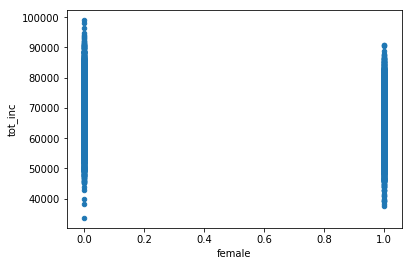

In [112]:
# Make a scatter plot to check probability calculation 
female = best_income['female']
tot_inc = best_income['tot_inc']
best_income.plot(x='female', y='tot_inc', kind='scatter')
plt.show()

In [113]:
#best_income['female'] = 0
#best_income.head()

In [114]:
#best_income.loc[best_income.predicted_fem >= 0.5,'female'] = 1; best_income

#### (c) Report mean, standard deviation, minimum, maximum and number of observations of imputed age and gender 

In [115]:
best_income['imputed_age'].describe()

count    10000.000000
mean        44.894036
std          0.219066
min         43.980016
25%         44.747065
50%         44.890281
75%         45.042239
max         45.706849
Name: imputed_age, dtype: float64

In [116]:
best_income['female'].describe()

count    10000.000000
mean         0.454600
std          0.497959
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: female, dtype: float64

__As for imputed age,__ 

* mean = 44.89 years old 
* standard deviation = 0.2191 
* minimum = 43.98 years old 
* maximum = 45.71 years old 
* number of observations = 10,000

__As for imputed gender (female),__

* mean = 0.4546 (~45% are female) 
* standard deviation = 0.498
* minimum = 0
* maximum = 1 
* number of observations = 10,0000

#### (d) report the correlation matrix for six variables 

In [117]:
best_income.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,imputed_age,constant,prob_female,female
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,1,0.259427,0.0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,1,0.001097,0.0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,1,0.300715,0.0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,1,0.422431,0.0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,1,0.556197,1.0


In [118]:
# Eliminate tot_inc and predicted_fem from the dataframe 

cor_best_income = best_income.drop(columns=['tot_inc', 'prob_female', 'constant'])
cor_best_income.head()

,lab_inc,cap_inc,hgt,wgt,imputed_age,female
0,52655.605507,9279.509829,64.568138,152.920634,44.745897,0.0
1,70586.979225,9451.016902,65.727648,159.534414,45.157777,0.0
2,53738.008339,8078.132315,66.268796,152.502405,44.745701,0.0
3,55128.180903,12692.670403,62.910559,149.218189,44.919024,0.0
4,44482.794867,9812.975746,68.678295,152.726358,44.554687,1.0


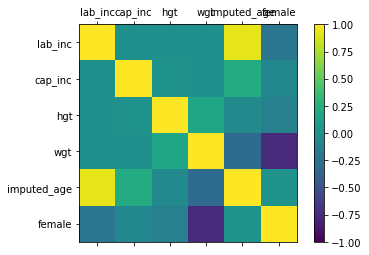

In [119]:
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    
corr_plot(cor_best_income)

In [120]:
corr = cor_best_income.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,imputed_age,female
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924329,-0.215469
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234234,-0.0625691
hgt,0.00278978,0.0215716,1,0.172103,-0.0449272,-0.127416
wgt,0.00450691,0.00629868,0.172103,1,-0.299395,-0.763821
imputed_age,0.924329,0.234234,-0.0449272,-0.299395,1,0.0193158
female,-0.215469,-0.0625691,-0.127416,-0.763821,0.0193158,1


### 2. Stationarity and data drift 

In [121]:
# Data import and preparation 

headers = ["grad_year", "gre_qnt", "salary_p4"]
income_intel = pd.read_table("IncomeIntel.txt", sep=",", names = headers, index_col=False)
income_intel

,grad_year,gre_qnt,salary_p4
0,2001.0,719.335812,67985.207551
1,2001.0,717.867044,53632.218539
2,2001.0,765.430196,68951.364320
3,2001.0,737.845450,71942.003515
4,2001.0,715.781826,61322.132663
5,2001.0,736.366346,53060.298357
6,2001.0,731.012665,50515.473390
7,2001.0,717.708400,51977.402886
8,2001.0,778.488683,55198.572048
9,2001.0,734.183877,62120.532331


#### (a) Estimate coefficients in the regression of $\text{salary_p4}_i = \beta_0 + \beta_1\text{gre_qnt}_i + \varepsilon_i$

In [122]:
# Define dependent and independent variables 

X_quant, y_salary = income_intel['gre_qnt'], income_intel['salary_p4']

In [123]:
# Fit and summarize model

X_quant = sm.add_constant(X_quant, prepend=False)
regressed_salary = sm.OLS(y_salary, X_quant)
res_salary = regressed_salary.fit()
print(res_salary.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.277
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.132
Time:                        20:38:46   Log-Likelihood:                -10507.
No. Observations:                1000   AIC:                         2.102e+04
Df Residuals:                     998   BIC:                         2.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt        1.7423      1.154      1.509      0.1

* $\beta_0$ is equal to 59020 with standard deviation of 744.576 
* $\beta_1$ is equal to 1.7423 with standard deviation of 1.154 (noted that p-value is much more than 0.5)

#### (b) Create a scatter plot of GRE quantitative score and graduation year 

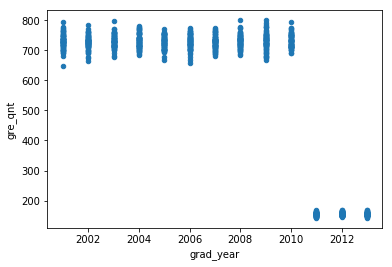

In [124]:
# Make a scatter plot 
grad_year = income_intel['grad_year']
gre_quant = income_intel['gre_qnt']
income_intel.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

The scatter plot shows that the GRE quantitative scores before and after 2011 are not on the same scale. This is problematic for our regression model because the GRE changed the scoring scale in 2011. The old scoring scale ranges from 200 to 800 while the new scoring scale ranges from 130 to 170.  

I propose that we convert the old GRE quant scores to the new scale by: 

1. rounding up both old and new GRE scores in the data set because old GRE score is a multiple of ten ranging from 200 to 800 and new GRE is an integer between 130 and 170 
2. convert old GRE scores to new GRE scores using [GRE Concordance table](https://www.ets.org/s/gre/pdf/concordance_information.pdf)

It is noted that the old GRE score is a multiple of ten, but our data set include scores which are not multiples of ten. I resolved this problem by creating a range of score conversion. For example, a score of 719 of our first observation falls between 710 (converted to 155) and 720 (converted to 156). Since 719 is more than 710 but less than 720, I convert it to 156. Thus, I treated lower bound as a cutoff point rather than looking at the distance of the score from the lower and upperbound. 

In [125]:
income_intel = income_intel.round({'gre_qnt': 0})

In [126]:
income_intel = income_intel.astype(dtype='int64')

In [127]:
income_intel.head()

,grad_year,gre_qnt,salary_p4
0,2001,719,67985
1,2001,718,53632
2,2001,765,68951
3,2001,738,71942
4,2001,716,61322


In [128]:
income_intel.tail()

,grad_year,gre_qnt,salary_p4
995,2013,150,50745
996,2013,165,42096
997,2013,153,53168
998,2013,146,70449
999,2013,159,72944


In [129]:
income_intel2 = income_intel.copy()

In [130]:
income_intel2.head()

,grad_year,gre_qnt,salary_p4
0,2001,719,67985
1,2001,718,53632
2,2001,765,68951
3,2001,738,71942
4,2001,716,61322


In [131]:
gre_qnt_array = income_intel2['gre_qnt'].values

In [132]:
def gre_conversion(array):
    n = 0
    array_mutated = array.copy()
    for vals in np.nditer(array):
        if vals <= 800 and vals > 790:
            array_mutated[n] = 166
        elif vals <= 790 and vals > 780:
            array_mutated[n] = 164
        elif vals <= 780 and vals > 770:
            array_mutated[n] = 163
        elif vals <= 770 and vals > 760:
            array_mutated[n] = 161
        elif vals <= 760 and vals > 750:
            array_mutated[n] = 160
        elif vals <= 750 and vals > 740:
            array_mutated[n] = 159
        elif vals <= 740 and vals > 730:
            array_mutated[n] = 158
        elif vals <= 730 and vals > 720:
            array_mutated[n] = 157
        elif vals <= 720 and vals > 710:
            array_mutated[n] = 156
        elif vals <= 710 and vals > 690:
            array_mutated[n] = 155
        elif vals <= 690 and vals > 680:
            array_mutated[n] = 154
        elif vals <= 680 and vals > 670:
            array_mutated[n] = 153
        elif vals <= 670 and vals > 650:
            array_mutated[n] = 152
        elif vals <= 650 and vals > 630:
            array_mutated[n] = 151
        elif vals <= 630 and vals > 620:
            array_mutated[n] = 150
        elif vals <= 620 and vals > 600:
            array_mutated[n] = 149
        elif vals <= 600 and vals > 580:
            array_mutated[n] = 148
        n = n + 1
    return array_mutated

In [133]:
adj_gre_qnt = np.apply_along_axis(gre_conversion, 0, gre_qnt_array)

In [134]:
income_intel['adj_gre_qnt'] = adj_gre_qnt

In [135]:
income_intel

,grad_year,gre_qnt,salary_p4,adj_gre_qnt
0,2001,719,67985,156
1,2001,718,53632,156
2,2001,765,68951,161
3,2001,738,71942,158
4,2001,716,61322,156
5,2001,736,53060,158
6,2001,731,50515,158
7,2001,718,51977,156
8,2001,778,55198,163
9,2001,734,62120,158


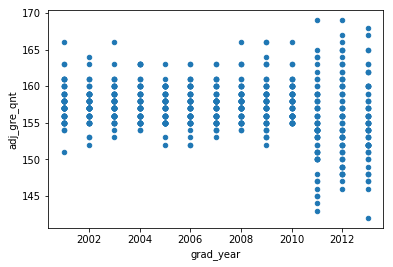

In [136]:
# Make a scatter plot to check the data after adjustment 

grad_year = income_intel['grad_year']
adj_gre_quant = income_intel['adj_gre_qnt']
income_intel.plot(x='grad_year', y='adj_gre_qnt', kind='scatter')
plt.show()

According to this scatter plot, the variance of GRE scores after 2011 is much higher than the adjusted GRE scores before 2011. This is because the raw GRE scores before 2011 are not lower than 580; therefore, no scores are lower than 150 on the new scoring range. This poses a different problem with linear regression which suggests that we should adopt a different method to standardize these scores. One way is to use z-scores. 

In [144]:
income_intel2.head()

,grad_year,gre_qnt,salary_p4,date
0,2001,719,67985,2001-01-01
1,2001,718,53632,2001-01-01
2,2001,765,68951,2001-01-01
3,2001,738,71942,2001-01-01
4,2001,716,61322,2001-01-01


#### (c) Create a scatter plot of income 4 years after graduation and graduation year 

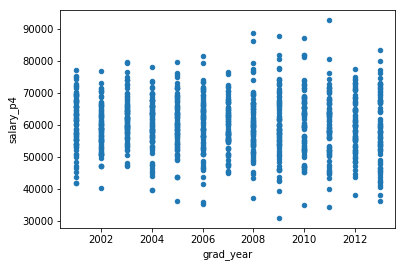

In [143]:
# Make a scatter plot 
grad_year = income_intel['grad_year']
salary = income_intel['salary_p4']
income_intel.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

### 3. Asssessment of Kossinets and Watts 

In their article *Origins of Homophily in an Evolving Social Network*, Kossinets and Watts examined the question of how homophily, the tendency of "like to associate with like," originates. More specifically, they set out to answer the question of how and on what grounds individuals choose to make or break certain ties over others and how the former choices might be able to explain why similar people tend to become acquainted than dissimilar counterparts. Historically, two distinct theoretical approaches explain why similar people form ties with the like, choice homophily (i.e. individual preferences) vis-à-vis induced homophily (i.e. structural proximity). To see which school of thought is correct, the authors set out to answer their research question by using a network data set from a particular research university. Their analysis shows that both choice and induced homophily play an important, but partial, role in originating homophily in their population of interests. In other words, both individual preferences and structural proximity reinforce each other in how the network of like people forms. 
          
Kossinets and Watts constructed their data set by merging information obtained from three different databases which are (1) logs of email interactions of undergraduate and graduate students, faculty and staff within a university over one academic year, (2) individual attributes such as status, gender, age etc. and (3) records of course registration. The population of the study consists of 30,396 observations which include undergraduate students (21%), graduate and professional students (27%), faculty members (13%), administrators and staff (13.4%) and affiliates (which includes postdoctoral researchers, visiting scholars, exchange students and recent alumni; 25%) within a large U.S. research university. The data spans over a one year period, but the authors note that their email logs include 7,156,162 messages during 270 days of observation (p. 411), which corresponds to the length of the two academic semesters. The description and definitionof all variables can be found in Appendix A of the paper (p. 439-442)
           
Regarding their choice of data cleaning, there are three potential problems. Firstly, Kossinets and Watts included only messages that were sent to a single recipient. Although this category makes up 82 percent of thier data, cleaning data in this fashion does not take into account emails that were sent to multiple recipients which can shed light on the origins of homophily. For instance, some users may send emails to a group of acquaintances without sending them to a particular person because they rely on other mode of communication. This also leads us to question on to what extent email logs can explain origins of homophily which will be discussed in the next section. Secondly, the authors noted that email accounts provided by university departments were excluded from the data set because they cannot be matched with employee records. Exclusion of departmental emails poses a problem to the analysis because it is questionable if the data set accurately reflects how individuals with both departmental and general email accounts choose to make or break ties, especially communication among users from the same department. If departmental emails were to be included, it may increase the role of structural proximity and change the authors' conclusion. Finally, Kossinets and Watts mentioned that a set of heuristics were used to determine conflicting values such as gender. This approach also casts doubt on how accurate the authors capture "similarity" among observations, especially when the authors did not report the percentage of conflicting and missing observations.    
           
One weakness of the match between explaining social relationships and email logs is that social relationships have more aspects than what can be captured by one means of communication. For example, younger users in the study may use other means of communication such as private messengers and telephone to communicate rather than emails. Some users may even have more than one email accounts for use in the personal and professional contexts. In addition, due to privacy concerns, email logs are limiting because the authors were not able to analyze the content of email conversation. Since the content was censored, the authors adopted the sliding window filter method to track how network of individuals evolve over time, determining how ties were established and lapsed. However, it is difficult to capture the depth of these relationships. For instance, some users may frequently communicate with each other through university emails, but they may not choose to spend time with each other outside of work or study context. As Kossinets and Watts noted, electronic communication through emails in certain organizations may systematically differ from one another and from normal everyday interaction. The authors addressed this limitation by proposing that future studies could conduct comparative analyses of network evolution of various environments such as businesses and government agencies. Overall, the use of university email logs to explain origins of homophily casts doubt on how much the result of the study can be generalized because of the intrinsic complexity of social relationships.   

